# Model Selection 
Model Selection is the process of choosing the right model for the problem. It is a crucial step in the machine learning process. 

In [4]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [5]:
#load the titanic dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
#split the dataset into target and features
X=df[['age','pclass','sex','embarked','fare']]
y=df['survived']

#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),#random forest is a tree based model 
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
] 

best_model = None #we have assign that models is none before selelction 
best_accuracy = 0.0

#loop through the models and evaluate them
for name, model in models: 
#create a pipeline for each model             #note it will run the model three times and check the best model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder( handle_unknown='ignore')),
        ('model', model)
    ])

#perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

#calculate the mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    #make predictions on the test data
    y_pred = pipeline.predict(X_test)

    #calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    #print the model name and accuracy
    print('Model:', name),
    print('Cross-Validation Accuracy:', mean_accuracy),
    print('Test Accuracy:', accuracy)
    print('\n')

    #check if the curret model has the best accuracy
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

        #print the best model
print('Best Model:', best_model)


Model: Random Forest
Cross-Validation Accuracy: 0.8019750272990552
Test Accuracy: 0.8212290502793296


Model: Gradient Boosting
Cross-Validation Accuracy: 0.7921236291126621
Test Accuracy: 0.7988826815642458


Model: XGBoost
Cross-Validation Accuracy: 0.803434933295352
Test Accuracy: 0.7932960893854749


Best Model: RandomForestClassifier(random_state=42)


# More model selection

In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [12]:
dt=sns.load_dataset('titanic')


In [15]:
#split the dataset into target and features
X=dt[['age','pclass','sex','embarked','fare']]
y=dt['survived']

#split the dataset into train and test
from sklearn.model_selection import train_test_split

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
]

best_model=None
best_accuracy=0.0

# Loop through the models and evaluate them
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder( handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate the mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the model name and accuracy
    print('Model:', name)
    print('Cross-Validation Accuracy:', mean_accuracy)
    print('Test Accuracy:', accuracy)
    print('\n')

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

        # Print the best model
print('Best Model:', best_model)

Model: Logistic Regression
Cross-Validation Accuracy: 0.7977839062346105
Test Accuracy: 0.8100558659217877


Model: Random Forest
Cross-Validation Accuracy: 0.7907121047966119
Test Accuracy: 0.8212290502793296


Model: Gradient Boosting
Cross-Validation Accuracy: 0.8048064611444893
Test Accuracy: 0.7988826815642458


Model: XGBoost
Cross-Validation Accuracy: 0.8076233625529401
Test Accuracy: 0.7932960893854749


Best Model: RandomForestClassifier(random_state=42)


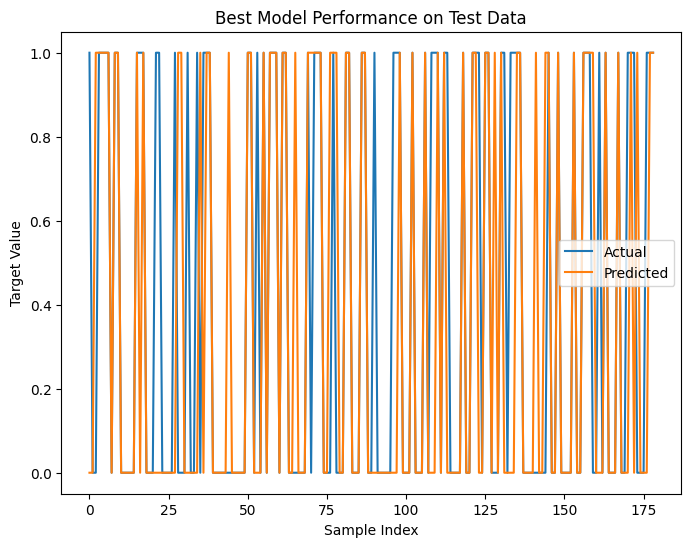

In [16]:
#plot the best model performance on the test data
import matplotlib.pyplot as plt

# Plot the best model performance on the test data
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Best Model Performance on Test Data')
plt.legend()
plt.show()